In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
#from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from imblearn.metrics import geometric_mean_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/shahriariit/opendataset/master/Parkinson%20(1).csv')

In [4]:
df.head()

,Recording,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shi_APQ11,HNR05,HNR15,HNR25,HNR35,HNR38,RPDE,DFA,PPE,GNE,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,Delta0,Delta1,Delta2,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12,Status
0,1,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,0.017463,0.019660,0.021882,59.437966,60.736249,71.882864,77.626729,77.538042,0.250433,0.599346,0.005397,0.900404,1.319502,1.336201,1.302408,1.329085,1.284922,1.209225,1.239354,1.277002,1.332503,1.347470,1.367540,1.402141,1.393809,1.397874,1.372464,1.390298,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610,0
1,2,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,0.013010,0.014097,0.016828,59.838895,62.655599,74.378669,79.989228,80.269783,0.271445,0.581242,0.075617,0.887042,1.215251,1.221557,1.265419,1.187177,1.256340,1.246375,1.283629,1.302498,1.308008,1.316527,1.370643,1.373966,1.344655,1.302399,1.347680,1.365750,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508,0
2,3,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,0.011049,0.012683,0.013038,57.293808,61.858336,73.665297,78.930502,79.033510,0.203531,0.600759,0.005283,0.889399,1.426075,1.220701,1.344188,1.346296,1.339797,1.334447,1.391798,1.349621,1.349904,1.340463,1.362594,1.313769,1.277938,1.312889,1.352442,1.243385,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402,0
3,1,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,0.014525,0.015696,0.018330,62.179573,68.678205,79.839984,84.367682,84.252430,0.261360,0.625216,0.030518,0.875984,1.495235,1.602983,1.572715,1.498323,1.561722,1.590510,1.626319,1.645811,1.666730,1.618487,1.493691,1.459040,1.383606,1.379629,1.217517,1.309647,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456,0
4,2,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,0.006461,0.008385,0.011037,67.534024,74.976858,85.727420,91.033967,91.145189,0.222069,0.602493,0.035602,0.902206,1.516959,1.581687,1.542668,1.613747,1.501956,1.258557,1.385013,1.452518,1.498049,1.421549,1.557644,1.187218,1.576015,1.252247,1.577338,1.583072,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023,0


In [5]:
df.describe()

,Recording,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shi_APQ11,HNR05,HNR15,HNR25,HNR35,HNR38,RPDE,DFA,PPE,GNE,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,Delta0,Delta1,Delta2,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12,Status
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2.000000,0.400000,0.583987,0.000044,0.003172,0.003532,0.038428,0.336832,0.021499,0.023468,0.028671,59.328203,63.674583,74.198478,80.187240,81.505404,0.310517,0.612911,0.271958,0.917801,1.345764,1.302292,1.289089,1.349270,1.354317,1.338350,1.334774,1.339938,1.354771,1.346205,1.346094,1.355388,1.338195,1.338939,1.335040,1.342467,1.343238,1.348914,1.337717,1.341786,1.340895,1.343978,1.341472,1.331433,1.346381,1.346144,0.500000
std,0.818203,0.490922,0.535769,0.000045,0.003373,0.004449,0.023213,0.205905,0.013787,0.014402,0.016610,14.541946,15.621195,16.442566,17.187765,17.395830,0.065639,0.077780,0.229851,0.033911,0.209207,0.235640,0.259544,0.215538,0.212376,0.216225,0.207402,0.216467,0.214952,0.203527,0.210776,0.215601,0.204511,0.222206,0.223335,0.227232,0.198174,0.212008,0.204978,0.209407,0.213689,0.211364,0.204085,0.211297,0.221484,0.208819,0.501045
min,1.000000,0.000000,0.148010,0.000007,0.000678,0.001036,0.007444,0.064989,0.003344,0.004103,0.006459,22.224723,26.274029,33.156101,36.494025,36.908213,0.162762,0.411359,0.004127,0.847307,0.770151,0.725522,0.569471,0.727609,0.771259,0.611540,0.829087,0.653565,0.839535,0.823632,0.813607,0.823157,0.844357,0.620845,0.647406,0.628107,0.766458,0.840133,0.741690,0.759689,0.764649,0.762798,0.811942,0.777012,0.643132,0.748411,0.000000
25%,1.000000,0.000000,0.298260,0.000019,0.001551,0.001867,0.024336,0.211785,0.012909,0.014986,0.019180,50.558623,54.237537,63.879230,69.823899,70.435013,0.263217,0.556756,0.040811,0.891408,1.208843,1.149207,1.122922,1.212101,1.218042,1.199275,1.204434,1.188848,1.220585,1.221013,1.229496,1.204163,1.197492,1.198202,1.182790,1.196205,1.208624,1.221101,1.197868,1.194186,1.194138,1.191881,1.189515,1.192397,1.202525,1.206559,0.000000
50%,2.000000,0.000000,0.481455,0.000035,0.002337,0.002870,0.032960,0.287885,0.018571,0.019897,0.024909,59.742330,64.844019,75.457858,80.992704,82.354119,0.305054,0.606502,0.246486,0.912809,1.340906,1.294779,1.298645,1.338791,1.342907,1.331794,1.323245,1.321939,1.340258,1.334706,1.338213,1.356528,1.338452,1.333607,1.341507,1.323866,1.351015,1.342237,1.337233,1.338437,1.344416,1.335517,1.349243,1.333345,1.347297,1.331212,0.500000
75%,3.000000,1.000000,0.681685,0.000056,0.003678,0.003991,0.045475,0.399860,0.025784,0.027900,0.033757,68.686365,73.439434,85.652177,92.330509,93.500429,0.349273,0.661144,0.405402,0.946479,1.491018,1.474178,1.479907,1.496511,1.497181,1.473760,1.452817,1.486387,1.482438,1.486456,1.466926,1.515044,1.474081,1.482893,1.485977,1.491861,1.488878,1.470287,1.485597,1.496845,1.490389,1.495355,1.475330,1.472589,1.506674,1.475235,1.000000
max,3.000000,1.000000,6.838200,0.000550,0.043843,0.065199,0.192600,1.747600,0.113240,0.120760,0.142440,101.206326,109.651117,120.712830,128.289325,129.985236,0.535953,0.784376,0.908395,0.987292,1.949103,1.835651,1.928430,1.857084,1.840846,1.976153,2.000783,2.016728,1.918429,2.039576,2.071291,1.983561,2.029982,2.028056,2.021287,1.979858,1.860588,2.038241,1.785984,1.988090,1.872799,1.920131,1.943331,1.949679,1.918392,1.930103,1.000000


In [6]:
print(df.shape)

(240, 47)


In [7]:
df

,Recording,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shi_APQ11,HNR05,HNR15,HNR25,HNR35,HNR38,RPDE,DFA,PPE,GNE,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,Delta0,Delta1,Delta2,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12,Status
0,1,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,0.017463,0.019660,0.021882,59.437966,60.736249,71.882864,77.626729,77.538042,0.250433,0.599346,0.005397,0.900404,1.319502,1.336201,1.302408,1.329085,1.284922,1.209225,1.239354,1.277002,1.332503,1.347470,1.367540,1.402141,1.393809,1.397874,1.372464,1.390298,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610,0
1,2,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,0.013010,0.014097,0.016828,59.838895,62.655599,74.378669,79.989228,80.269783,0.271445,0.581242,0.075617,0.887042,1.215251,1.221557,1.265419,1.187177,1.256340,1.246375,1.283629,1.302498,1.308008,1.316527,1.370643,1.373966,1.344655,1.302399,1.347680,1.365750,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508,0
2,3,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,0.011049,0.012683,0.013038,57.293808,61.858336,73.665297,78.930502,79.033510,0.203531,0.600759,0.005283,0.889399,1.426075,1.220701,1.344188,1.346296,1.339797,1.334447,1.391798,1.349621,1.349904,1.340463,1.362594,1.313769,1.277938,1.312889,1.352442,1.243385,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402,0
3,1,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,0.014525,0.015696,0.018330,62.179573,68.678205,79.839984,84.367682,84.252430,0.261360,0.625216,0.030518,0.875984,1.495235,1.602983,1.572715,1.498323,1.561722,1.590510,1.626319,1.645811,1.666730,1.618487,1.493691,1.459040,1.383606,1.379629,1.217517,1.309647,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456,0
4,2,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,0.006461,0.008385,0.011037,67.534024,74.976858,85.727420,91.033967,91.145189,0.222069,0.602493,0.035602,0.902206,1.516959,1.581687,1.542668,1.613747,1.501956,1.258557,1.385013,1.452518,1.498049,1.421549,1.557644,1.187218,1.576015,1.252247,1.577338,1.583072,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2,0,0.57585,0.000037,0.003701,0.005149,0.016868,0.14928,0.008835,0.010232,0.015297,28.530790,28.625326,37.778480,43.165327,44.085825,0.215651,0.593082,0.167809,0.930245,1.145728,1.143635,1.117527,1.149514,1.137022,1.146306,1.137069,1.122076,1.170275,1.112929,1.134914,1.127654,1.071029,1.111652,1.084720,1.149059,1.116409,1.104511,1.099866,1.080320,1.154057,1.117423,1.167076,1.132436,1.107824,1.109144,1
236,3,0,0.23322,0.000015,0.001270,0.001497,0.017923,0.16720,0.008436,0.011578,0.015473,33.617211,36.264629,45.526764,52.135100,53.417630,0.220526,0.570358,0.246111,0.959233,1.097069,1.117393,1.102432,1.108991,1.101534,1.055106,1.093827,1.097773,1.092962,1.099811,1.119685,1.048671,1.112830,1.112963,1.130445,1.057239,1.107477,1.083859,1.101819,1.114161,1.090095,1.140705,1.126667,1.158444,1.096073,1.141835,1
237,1,0,0.26862,0.000022,0.001354,0.001615,0.028040,0.24182,0.015937,0.015441,0.021133,56.853169,64.663462,76.610752,82.794477,83.509902,0.263589,0.652365,0.711209,0.914342,1.372905,1.351790,1.362514,1.367463,1.274210,1.364689,1.384608,1.270682,1.387869,1.368986,1.391191,1.310968,1.341734,1.283778,1.370597,1.410869,1.335189,1.385580,1.281551,1.367171,1.319055,1.367095,1.343193,1.374330,1.383364,1.456409,1
238,2,0,0.45376,0.000037,0.002724,0.002258,0.064605,0.58002,0.041295,0.027626,0.037650,60.096871,67.562663,79.713585,86.826843,87.382895,0.341671,0.638666,0.736968,0.903977,1.296298,1.269313,1.314609,1.335188

In [8]:
X=df.drop('Status', 1)
Y=df.Status

In [9]:
df = pd.DataFrame(X)
print(df.head())

   Recording  Gender  Jitter_rel  ...   Delta10   Delta11   Delta12
0          1       1     0.25546  ...  1.405495  1.416705  1.354610
1          2       1     0.36964  ...  1.314549  1.318999  1.323508
2          3       1     0.23514  ...  1.388910  1.305469  1.305402
3          1       0     0.29320  ...  1.638346  1.604008  1.621456
4          2       0     0.23075  ...  1.533666  1.297536  1.382023

[5 rows x 46 columns]


In [10]:
y = Y

In [11]:
X, y

(     Recording  Gender  Jitter_rel  ...   Delta10   Delta11   Delta12
 0            1       1     0.25546  ...  1.405495  1.416705  1.354610
 1            2       1     0.36964  ...  1.314549  1.318999  1.323508
 2            3       1     0.23514  ...  1.388910  1.305469  1.305402
 3            1       0     0.29320  ...  1.638346  1.604008  1.621456
 4            2       0     0.23075  ...  1.533666  1.297536  1.382023
 ..         ...     ...         ...  ...       ...       ...       ...
 235          2       0     0.57585  ...  1.132436  1.107824  1.109144
 236          3       0     0.23322  ...  1.158444  1.096073  1.141835
 237          1       0     0.26862  ...  1.374330  1.383364  1.456409
 238          2       0     0.45376  ...  1.331923  1.423062  1.307353
 239          3       0     0.34706  ...  1.395653  1.315691  1.422534
 
 [240 rows x 46 columns], 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 235    1
 236    1
 237    1
 238    1
 239    1
 Name: Stat

In [12]:
classifier_name = []
accuracy = []
roc = []
f_measure = []
geometric_mean = []
sensitivity = []
specificity = []
false_positive_rate = []
false_negative_rate = []
fpositive_rate_curve = []
tpositive_rate_curve = []

In [13]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.01)
y_pred = cross_val_predict(estimator = dt, X = X, y = y, cv = 10)

In [14]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred, average = 'weighted'))
print('F-Measure :      ', f1_score(y, y_pred, average = 'weighted'))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('DT')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)





Accuracy :        0.7166666666666667
ROC :             0.7166666666666667
F-Measure :       0.7161739130434782
Geometric Mean :  0.7166666666666667
Sensitivity :     0.7166666666666667
Specificity :     0.7166666666666667
False Positive Rate (Fall Out): 0.2833333333333333
False Negative Rate (Miss Rate): 0.2833333333333333


In [15]:
knn = KNeighborsClassifier()
y_pred = cross_val_predict(estimator = knn, X = X, y = y, cv = 10)

In [16]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('KNN')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7208333333333333
ROC :             0.7208333333333334
F-Measure :       0.7172995780590717
Geometric Mean :  0.7208333333333333
Sensitivity :     0.7208333333333333
Specificity :     0.7208333333333333
False Positive Rate (Fall Out): 0.2791666666666667
False Negative Rate (Miss Rate): 0.2791666666666667


In [17]:
nb = GaussianNB()
y_pred = cross_val_predict(estimator = nb, X = X, y = y, cv = 10)

In [18]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('GNB')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.825
ROC :             0.8250000000000001
F-Measure :       0.8220338983050848
Geometric Mean :  0.825
Sensitivity :     0.825
Specificity :     0.825
False Positive Rate (Fall Out): 0.17500000000000004
False Negative Rate (Miss Rate): 0.17500000000000004


In [19]:
sv = svm.SVC(gamma='auto')
y_pred = cross_val_predict(estimator = sv, X = X, y = y, cv = 10)

In [20]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('SVM')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7291666666666666
ROC :             0.7291666666666667
F-Measure :       0.7161572052401746
Geometric Mean :  0.7291666666666666
Sensitivity :     0.7291666666666666
Specificity :     0.7291666666666666
False Positive Rate (Fall Out): 0.27083333333333337
False Negative Rate (Miss Rate): 0.27083333333333337


In [21]:
logreg = LogisticRegression(solver='lbfgs',max_iter=1000)
y_pred = cross_val_predict(estimator = logreg, X = X, y = y, cv = 10)

In [22]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('LR')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7708333333333334
ROC :             0.7708333333333334
F-Measure :       0.7698744769874478
Geometric Mean :  0.7708333333333334
Sensitivity :     0.7708333333333334
Specificity :     0.7708333333333334
False Positive Rate (Fall Out): 0.22916666666666663
False Negative Rate (Miss Rate): 0.22916666666666663


In [23]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
y_pred = cross_val_predict(estimator = mlp, X = X, y = y, cv = 10)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [24]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('MLP')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.5708333333333333
ROC :             0.5708333333333334
F-Measure :       0.4432432432432432
Geometric Mean :  0.5708333333333333
Sensitivity :     0.5708333333333333
Specificity :     0.5708333333333333
False Positive Rate (Fall Out): 0.4291666666666667
False Negative Rate (Miss Rate): 0.4291666666666667


In [25]:
xgb = XGBClassifier()
y_pred = cross_val_predict(estimator = xgb, X = X, y = y, cv = 10) 

In [26]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('XGB')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7458333333333333
ROC :             0.7458333333333333
F-Measure :       0.735930735930736
Geometric Mean :  0.7458333333333333
Sensitivity :     0.7458333333333333
Specificity :     0.7458333333333333
False Positive Rate (Fall Out): 0.25416666666666665
False Negative Rate (Miss Rate): 0.25416666666666665


In [27]:
randomfForest = RandomForestClassifier(n_estimators=10)
y_pred = cross_val_predict(estimator = randomfForest, X = X, y = y, cv = 10)

In [28]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('RF')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7708333333333334
ROC :             0.7708333333333334
F-Measure :       0.7533632286995516
Geometric Mean :  0.7708333333333334
Sensitivity :     0.7708333333333334
Specificity :     0.7708333333333334
False Positive Rate (Fall Out): 0.22916666666666663
False Negative Rate (Miss Rate): 0.22916666666666663


In [29]:
extraTree = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
y_pred = cross_val_predict(estimator = extraTree, X = X, y = y, cv = 10)

In [30]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('ET')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7708333333333334
ROC :             0.7708333333333334
F-Measure :       0.7488584474885845
Geometric Mean :  0.7708333333333334
Sensitivity :     0.7708333333333334
Specificity :     0.7708333333333334
False Positive Rate (Fall Out): 0.22916666666666663
False Negative Rate (Miss Rate): 0.22916666666666663


In [31]:
adaBoost = AdaBoostClassifier(n_estimators=100)
y_pred = cross_val_predict(estimator = adaBoost, X = X, y = y, cv = 10)

In [32]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('AdaBoost')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.6958333333333333
ROC :             0.6958333333333333
F-Measure :       0.6970954356846473
Geometric Mean :  0.6958333333333333
Sensitivity :     0.6958333333333333
Specificity :     0.6958333333333333
False Positive Rate (Fall Out): 0.3041666666666667
False Negative Rate (Miss Rate): 0.3041666666666667


In [33]:
GradientBoost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
y_pred = cross_val_predict(estimator = GradientBoost, X = X, y = y, cv = 10)

In [34]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('GB')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7083333333333334
ROC :             0.7083333333333333
F-Measure :       0.6929824561403509
Geometric Mean :  0.7083333333333334
Sensitivity :     0.7083333333333334
Specificity :     0.7083333333333334
False Positive Rate (Fall Out): 0.29166666666666663
False Negative Rate (Miss Rate): 0.29166666666666663


In [35]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
y_pred = cross_val_predict(estimator = sgd, X = X, y = y, cv = 10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

In [36]:

print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('SGD')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.5
ROC :             0.5
F-Measure :       0.5
Geometric Mean :  0.5
Sensitivity :     0.5
Specificity :     0.5
False Positive Rate (Fall Out): 0.5
False Negative Rate (Miss Rate): 0.5


In [37]:
list_of_result_parameters = list(zip(classifier_name, accuracy, roc, f_measure, geometric_mean,sensitivity,specificity,false_positive_rate, false_negative_rate))

In [38]:
df_result = pd.DataFrame(list_of_result_parameters, columns = ['Classifier','Accuracy', 'ROC', 'F-Measure', 'Geometric Mean', 'Sensitivity', 'Specificity', 'False Positive Rate (Fall Out)', 'False Negative Rate (Miss Rate)'])

In [39]:
df_result

,Classifier,Accuracy,ROC,F-Measure,Geometric Mean,Sensitivity,Specificity,False Positive Rate (Fall Out),False Negative Rate (Miss Rate)
0,DT,0.716667,0.716667,0.716174,0.716667,0.716667,0.716667,0.283333,0.283333
1,KNN,0.720833,0.720833,0.720790,0.720833,0.720833,0.720833,0.279167,0.279167
2,GNB,0.825000,0.825000,0.824951,0.825000,0.825000,0.825000,0.175000,0.175000
3,SVM,0.729167,0.729167,0.728597,0.729167,0.729167,0.729167,0.270833,0.270833
4,LR,0.770833,0.770833,0.770829,0.770833,0.770833,0.770833,0.229167,0.229167
5,MLP,0.570833,0.570833,0.547045,0.570833,0.570833,0.570833,0.429167,0.429167
6,XGB,0.745833,0.745833,0.745475,0.745833,0.745833,0.745833,0.254167,0.254167
7,RF,0.770833,0.770833,0.769678,0.770833,0.770833,0.770833,0.229167,0.229167
8,ET,0.770833,0.770833,0.769065,0.770833,0.770833,0.770833,0.229167,0.229167
9,AdaBoost,0.695833,0.695833,0.695828,0.695833,0.695833,0.695833,0.304167,0.304167


In [40]:
#No need to sort the table //df_final_result = df_result.sort_values(['Accuracy','F-Measure'], ascending = False)

In [41]:
#df_final_result

In [44]:
from google.colab import files
# create excel writer object
writer = pd.ExcelWriter('Primary Dataset Result.xlsx')
# write dataframe to excel
df_result.to_excel(writer)
# save the excel
writer.save()
files.download('Primary Dataset Result.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

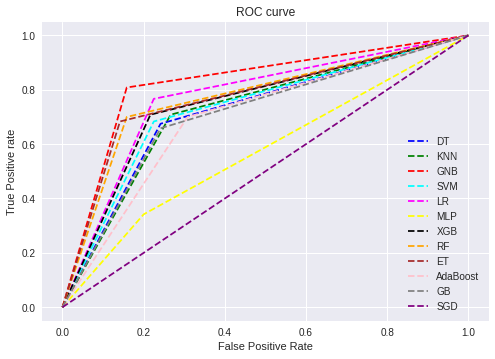

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
# matplotlib
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpositive_rate_curve[0], tpositive_rate_curve[0], linestyle='--',color='blue', label='DT')
plt.plot(fpositive_rate_curve[1], tpositive_rate_curve[1], linestyle='--',color='green', label='KNN')
plt.plot(fpositive_rate_curve[2], tpositive_rate_curve[2], linestyle='--',color='red', label='GNB')
plt.plot(fpositive_rate_curve[3], tpositive_rate_curve[3], linestyle='--',color='cyan', label='SVM')
plt.plot(fpositive_rate_curve[4], tpositive_rate_curve[4], linestyle='--',color='magenta', label='LR')
plt.plot(fpositive_rate_curve[5], tpositive_rate_curve[5], linestyle='--',color='yellow', label='MLP')
plt.plot(fpositive_rate_curve[6], tpositive_rate_curve[6], linestyle='--',color='black', label='XGB')
plt.plot(fpositive_rate_curve[7], tpositive_rate_curve[7], linestyle='--',color='orange', label='RF')
plt.plot(fpositive_rate_curve[8], tpositive_rate_curve[8], linestyle='--',color='brown', label='ET')
plt.plot(fpositive_rate_curve[9], tpositive_rate_curve[9], linestyle='--',color='pink', label='AdaBoost')
plt.plot(fpositive_rate_curve[10], tpositive_rate_curve[10], linestyle='--',color='gray', label='GB')
plt.plot(fpositive_rate_curve[11], tpositive_rate_curve[11], linestyle='--',color='purple', label='SGD')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('Primary_Dataset_ROC_curve.png',dpi=300)
plt.show();
files.download('Primary_Dataset_ROC_curve.png')